#### INFO7390 Adv Data Sci  
## **Mini Project 3 - GAN**  
    
Name: Fangqing Wu  
NUID: 001305642

---
**License**  
This project is licensed under [MIT License](https://raw.githubusercontent.com/fwqfwq/dataset/master/MIT%20License)
\
\
**Links**  
Google Colab: https://colab.research.google.com/drive/1cR-ax7YVD0OHxwfef2-d-YFQBIGVT1le?usp=sharing 

Dataset: Cifar-10 Python https://www.kaggle.com/pankrzysiu/cifar10-python   





 ---
### **Abstract**  
Generative Adversarial Networks (GAN) are used to generate images that never existed before, learning about the world and creating new versions of those images that never existed.  

In this project DCGAN would be implemented. A Generator and a Discriminator would be applied to both create a image and assesse the images to tell the generator if they are similar to what it has been trained on, also with the tuning results of hyperparameters. 

---



### **Dataset Introduction** 

<!-- The main data repository consists of:  
>| Featrue | Description | | Featrue | Description | | Featrue | Description |
| ----------- | ----------- | | ----------- | ----------- | | ----------- | ----------- |
| 'age' | Age | | 'anaemia' | Decrease of red blood cells or hemoglobin (boolean) | | 'creatinine_phosphokinase' | Level of the CPK enzyme in the blood (mcg/L) |
| 'diabetes' | If the patient has diabetes (boolean) | | 'ejection_fraction' | Percentage of blood leaving the heart at each contraction (percentage) | | 'high_blood_pressure' | If the patient has hypertension (boolean)  |
| 'platelets' | Platelets in the blood (kiloplatelets/mL) | | 'serum_creatinine' | Level of serum creatinine in the blood (mg/dL) | | 'serum_sodium' | Level of serum sodium in the blood (mEq/L) |
| 'sex' | Woman or man (binary) || 'smoking' | If the patient smokes or not (boolean) |  | 'time' | Follow-up period (days) | 
| 'DEATH_EVENT' | If the patient deceased during the follow-up period (boolean) | 



Total with 13 features; and the target is \``DEATH_EVENT`\`.    -->

The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research.   
The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.  
It is a famous image dataset which could be utilized for various goals.   

<img src='https://drive.google.com/uc?id=1SIIXG5a-Gzxkzox_Ax602j-yNez2JAGY' width="500" align="center">

   
### **Dataset Exploration & Preprocessing**   


#### 0\. Import part 

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import warnings
import random
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics
import statsmodels.api as sm
import scipy.stats as stats
import tensorflow as tf

from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam,SGD

from sklearn.metrics import r2_score, mean_squared_error, roc_curve, auc, roc_auc_score, classification_report, confusion_matrix
from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')

from __future__ import print_function
import argparse
import os
import random
import time
from tensorflow.keras import layers
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torch.autograd import Variable
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



#### 1\. Load dataset  
Using Cifar-10 from tensorflow.datasets.   
*For the variables, these are raw ones without processing.*  

In [ ]:
# Load the data 
(xx_train, yy_train), (xx_test, yy_test) = tf.keras.datasets.cifar10.load_data()
# Tag with the names 
tag = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 2s 0us/step


A simple look at the dataset. 

In [ ]:
# Define a function for 6 image showing
def imgShow(x, y):
  fig, ax = plt.subplots(nrows=1, ncols=6, figsize=[16, 9])
  for i in range(len(ax)):
      ax[i].set_title(tag[y[i, 0]])
      ax[i].imshow(x[i])

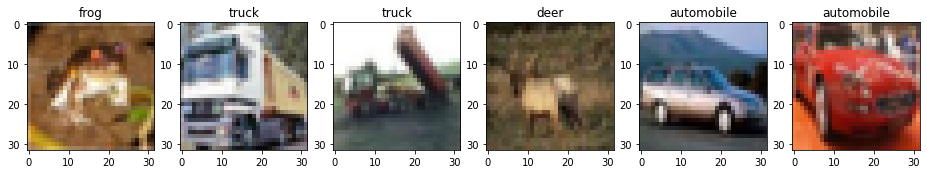

In [ ]:
imgShow(xx_train, yy_train)

#### 2\. Data Preprocessing  
  
>**Normalize** X:   
Minus mean value, then divide the standard value. 

In [ ]:
X_train = (xx_train - xx_train.mean()) / xx_train.std()
X_test = (xx_test - xx_train.mean()) / xx_train.std()
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (50000, 32, 32, 3)
X_test shape:  (10000, 32, 32, 3)


These're 32\*32\*3 color image. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


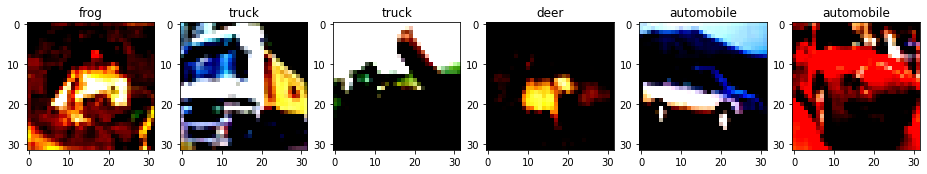

In [ ]:
imgShow(X_train, yy_train)

In [ ]:
X_train[0]

array([[[-0.96192505, -0.91515971, -0.89957127],
        [-1.21134019, -1.16457485, -1.1801633 ],
        [-1.10222107, -1.13339796, -1.21134019],
        ...,
        [ 0.58133111,  0.17603151, -0.19809119],
        [ 0.48780043,  0.06691239, -0.29162187],
        [ 0.42544665,  0.05132394, -0.27603342]],

       [[-1.63222823, -1.56987445, -1.56987445],
        [-1.88164337, -1.88164337, -1.88164337],
        [-1.60105134, -1.7569358 , -1.88164337],
        ...,
        [ 0.0357355 , -0.50986012, -1.02427884],
        [-0.02661829, -0.58780235, -1.10222107],
        [ 0.02014705, -0.52544856, -0.99310194]],

       [[-1.49193222, -1.50752067, -1.554286  ],
        [-1.63222823, -1.77252425, -1.88164337],
        [-1.11780951, -1.46075533, -1.7569358 ],
        ...,
        [-0.04220673, -0.5722139 , -1.10222107],
        [-0.01102984, -0.5722139 , -1.10222107],
        [-0.18250275, -0.74368681, -1.22692864]],

       ...,

       [[ 1.36075342,  0.76839246, -0.38515255],
        [ 1

The images have been normalized. 

>**One-hot encode** labels for Y

In [ ]:
# From 1 - 10
Y_train = tf.keras.utils.to_categorical(yy_train, num_classes=10)
Y_test = tf.keras.utils.to_categorical(yy_test, num_classes=10)
print('Y_train shape: ', Y_train.shape)

print('5 examples for Y_train: \n', Y_train[:5])

Y_train shape:  (50000, 10)
5 examples for Y_train: 
 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


### **GAN Implementation**

>**GAN**:   
- Generative Adversarial Networks 
- Unsupervised Learning Algorithms  
- Two parts for networks: Generator, Discriminator  
  <u>Generator</u>: a forger and tries to create real images(in our case) from random noise  
  <u>Discriminator</u>: an evaluator and tries to distinguish real images from fake ones
- Different types of GANs: DCGAN, CycleGAn, StyleGAN, IsGAN, and so on     
  <u>DCGAN</u>: Deep Convolotional GAN, a direct extension of the GAN  
  <u>CycleGAN</u>: an extension to the GAN for image-to-image translation without paired image data 



<img src='https://drive.google.com/uc?id=1HBrwDBq6LEZsq3oEUsNSjYGdQ7A1DLRp' width="500" align="center">


In this project, DCGAN would be used to implement the Generator and Discriminator for Cifar10.   
*• Reference for coding: https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html*

Define some inputs:

In [ ]:
# Number of workers for dataloader (threads)
workers = 5
# Batch size used in training (default 128)
batch_size = 128
# Spatial size of training images. All images will be resized to this size using a transformer.
# (default 64 x 64)
image_size = 64
# Length of latent vector (input noise dimension)
latent_dim = 100
# Learning rate for training (default 0.0002)
lr = 0.0002
# Number of training epochs
epochs = 25
# Buffer Size
buffer_size = 60000

Buffer and shuffle the data. 

In [ ]:
X_train = tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size).batch(batch_size)

For now:  
Inputs: Image with three color channel and 32×32 pixels in size.  
Outputs: Binary classification, likelihood the sample is real (or fake).

**In the below part, a Generator, a Discriminator, loss and the optimizer would be created first, then would be applied into the dataset(X_train).**

>Function for Generator: 

The generator uses \``tf.keras.layers.Conv2DTranspose`\`   (upsampling) layers to produce an image from a seed (random noise). Start with a Dense layer that takes this seed as input, then upsample several times until you reach the desired image size of 32x32x3.    
Activations in every layer except the last layer is LeakyReLu, Leaky version of a Rectified Linear Unit,  allowing a small gradient when the unit is not active.   
Batch Normalization stabilizes learning by normalizing the input to each unit to have zero mean and unit variance. This helps deal with training problems that arise due to poor initialization and helps the gradients flow in deeper models.  

  


In [ ]:
# Define the standalone generator model
def make_generator_model(latent_dim):
	model = Sequential()
	# foundation for 4x4 image
	n_nodes = 256 * 4 * 4
	model.add(layers.Dense(n_nodes, input_dim=latent_dim))
	model.add(layers.LeakyReLU(alpha=0.2))
	model.add(Reshape((4, 4, 256)))
 
	# upsample to 8x8
  # strides: An integer or tuple/list of 2 integers, 
  #          specifying the strides of the convolution along the height and width.
  # padding: "same": padding evenly, same dimensions with input
	model.add(layers.Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  # alpha: Float >= 0. Negative slope coefficient. Default to 0.3.
	model.add(layers.LeakyReLU(alpha=0.2))
 
	# upsample to 16x16
	model.add(layers.Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(layers.LeakyReLU(alpha=0.2))
 
	# upsample to 32x32
	model.add(layers.Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(layers.LeakyReLU(alpha=0.2))
 
	# output layer
	model.add(layers.Conv2D(3, (3,3), activation='tanh', padding='same'))
 
	return model

Use the (as yet untrained) generator to create an image.

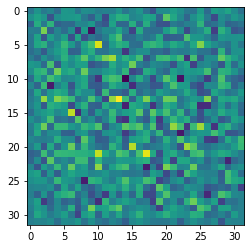

In [ ]:
generator = make_generator_model(latent_dim)

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0])

In [ ]:
generated_image.shape

TensorShape([1, 32, 32, 3])

Get the summary for generator with latent number = 100. 

In [ ]:
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4096)              413696    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 4096)              0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 8, 8, 128)         524416    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 16, 16, 128)       262272    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 128)       0

To tuning the generator, change the value of 'latent_dim'. 

In [ ]:
# Tuning the inputs for the generator
def generate_latent(latent_dim, n_samples):
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

# !Didn't use it here

>Function for Discriminator:   

This discriminator is a CNN-based image classifier.

In [ ]:
# Define the standalone discriminator model
def make_discriminator_model(in_shape=(32,32,3)):
	model = Sequential()
 
	# normal
	model.add(layers.Conv2D(64, (3,3), padding='same', input_shape=in_shape))
	model.add(layers.LeakyReLU(alpha=0.2))
 
	# downsample
	model.add(layers.Conv2D(128, (3,3), strides=(2,2), padding='same'))
	model.add(layers.LeakyReLU(alpha=0.2))
 
	# downsample
	model.add(layers.Conv2D(128, (3,3), strides=(2,2), padding='same'))
	model.add(layers.LeakyReLU(alpha=0.2))
 
	# downsample
	model.add(layers.Conv2D(256, (3,3), strides=(2,2), padding='same'))
	model.add(layers.LeakyReLU(alpha=0.2))
 
	# classifier
	model.add(layers.Flatten())
	model.add(layers.Dropout(0.4))
	model.add(layers.Dense(1, activation='sigmoid'))
 
	# compile model
  # learning_rate: a Tensor
  # beta_1: a float value or a constant float tensor
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

Use the (as yet untrained) discriminator to classify the generated images as real or fake.   
The model will be trained to output positive values for real images, and negative values for fake images.

In [ ]:
discriminator = make_discriminator_model()
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 256)        

In [ ]:
decision = discriminator(generated_image)
print(decision)

tf.Tensor([[0.707444]], shape=(1, 1), dtype=float32)


>Loss Functions and Optimizers

In [ ]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

Discriminator loss:  
This method quantifies how well the discriminator is able to distinguish real images from fakes.   
It compares the discriminator's predictions on real images to an array of 1s, and the discriminator's predictions on fake (generated) images to an array of 0s.

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

Generator loss:  
The generator's loss quantifies how well it was able to trick the discriminator. Intuitively, if the generator is performing well, the discriminator will classify the fake images as real (or 1). 

In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

The discriminator and the generator optimizers are different since we will train two networks separately.

Adam optimizer:   
Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.


In [ ]:
generator_optimizer = Adam(1e-4)
discriminator_optimizer = Adam(1e-4)

>Save and restore models: using the checkpoints  

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

>Define the training loop. 

1\. Generator receiving a random seed as input   
2\. Discriminator then used to classify real images (drawn from the training set) and fakes images (produced by the generator)  
3\. The loss is calculated for each of these models, and the gradients are used to update the generator and discriminator  




In [ ]:
num_examples_to_generate = 16

# Reuse this seed overtime to visualize progress 
seed = tf.random.normal([num_examples_to_generate, latent_dim])

In [ ]:
# `tf.function`: causes the function to be "compiled"
@tf.function
def train_step(images):
    noise = tf.random.normal([batch_size, latent_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      # Real and fake output 
      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      # Generator and Discriminator loss
      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF 
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

Generate and save the images.

In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4,4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5)
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

>Train the dataset. 

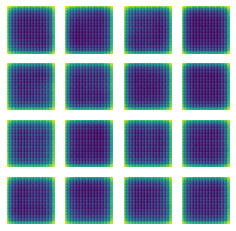

In [ ]:
train(X_train, epochs)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

Train another more

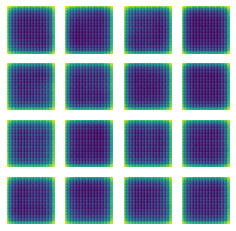

In [ ]:
train(X_train, epochs + 15)

   
### **Conclusion**  
The result is not good. Very vague figures.   
After all, the entire process of GAN:   
First see how D and G’s losses changed during training.   
Second, visualize G’s output on the fixed_noise batch for every epoch.   
And third, look at a batch of real data next to a batch of fake data from G.  


   
### **Reference** 

[1] Cifar-10 Datasrt https://www.cs.toronto.edu/~kriz/cifar.html   
[2] How to Normalize, Center, and Standardize Image Pixels in Keras https://machinelearningmastery.com/how-to-normalize-center-and-standardize-images-with-the-imagedatagenerator-in-keras/   
[3] 6 GAN Architectures You Really Should Know https://neptune.ai/blog/6-gan-architectures  
[4] A Tour of Generative Adversarial Network Models https://machinelearningmastery.com/tour-of-generative-adversarial-network-models/    
[5] DCGAN https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html    
[6] Keras Optimizer https://keras.io/api/optimizers/  
[7] Tensorflow DCGAN https://www.tensorflow.org/tutorials/generative/dcgan 